# Notebook Imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

plt.style.use("ggplot")

# Reading Data

In [2]:
df = pd.read_csv("cleaned_data.csv", index_col=0)
df = df.drop(columns=["title"])
df.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,T


# Splitting Dataset


In [3]:
encoding = {"E": 0, "ET": 1, "T": 2, "M": 3}
df.esrb_rating = df.esrb_rating.replace(encoding)

In [4]:
train, val = train_test_split(df, test_size=0.2)


# Data Cleaning

In our data we have a lot of explanatory variables, some of which are possibly not highly correlated with the explanatory variable, and hence would end up causing bias in our bias
 

For this reason, we can remove the variables which are not correlated with the explanatory variable. 

The following cells lists down the variables sorted in ascending order of absolute value of correlation with esrb_rating

In [5]:
# train.corr().esrb_rating.sort_values(key= lambda x: abs(x))

We remove the variables with abs(correlation) < 0.2

In [6]:
# columns_to_drop = train.columns[
#     train.corr().esrb_rating.sort_values(key=lambda x: abs(x)) < 0.15
# ]

# train = train.drop(columns=columns_to_drop)
# train.head()


Printing the new correlation matrix


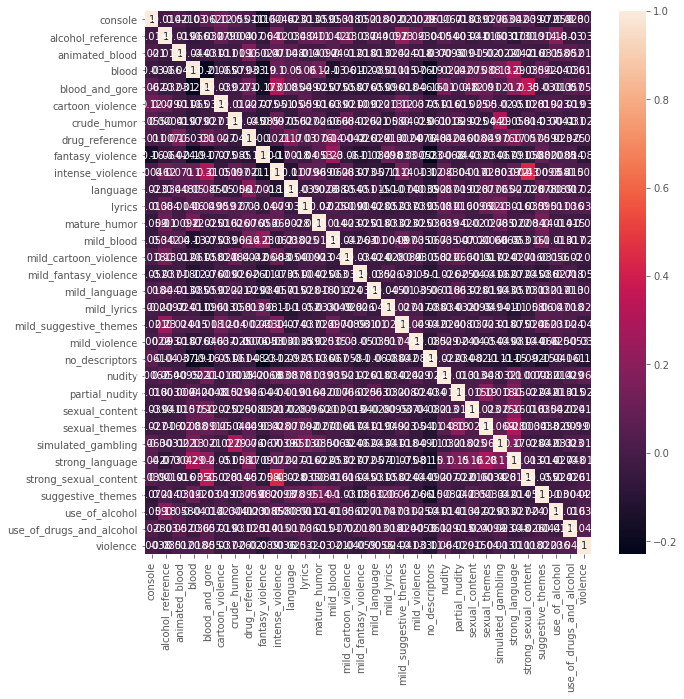

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.drop(columns="esrb_rating").corr(), annot=True)
plt.show()

Divided into x and y

In [8]:
train_x = train.drop(columns="esrb_rating")
train_y = train.esrb_rating

val_x = val.drop(columns="esrb_rating")
val_y = val.esrb_rating

<h1>Important features from Random Forest Classifier</h1>

In [9]:
max_depth = math.ceil(0.3 * len(train_x.columns))

No handles with labels found to put in legend.


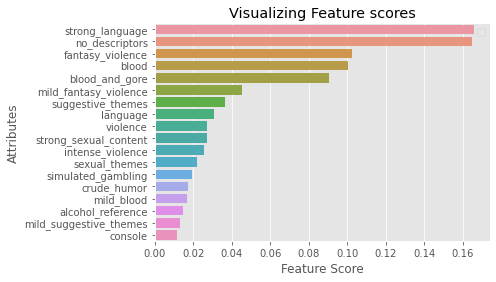

strong_language           0.165616
no_descriptors            0.164960
fantasy_violence          0.102245
blood                     0.100277
blood_and_gore            0.090705
mild_fantasy_violence     0.045155
suggestive_themes         0.036653
language                  0.030943
violence                  0.027216
strong_sexual_content     0.027020
intense_violence          0.025558
sexual_themes             0.021670
simulated_gambling        0.019433
crude_humor               0.017245
mild_blood                0.016535
alcohol_reference         0.014441
mild_suggestive_themes    0.013018
console                   0.011669
dtype: float64

In [10]:
model = RandomForestClassifier(n_estimators=300, max_depth=max_depth, random_state=1, criterion="gini").fit(train_x, train_y)
feature_imp = pd.Series(model.feature_importances_,index=train_x.columns).sort_values(ascending=False)
feature_imp = feature_imp[feature_imp > 0.01]

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Score')
plt.ylabel('Attributes')
plt.title("Visualizing Feature scores")
plt.legend()
plt.show()

feature_imp

In [11]:
train = train.drop(columns=feature_imp.index)
train.head()
train.columns

Index(['animated_blood', 'cartoon_violence', 'drug_reference', 'lyrics',
       'mature_humor', 'mild_cartoon_violence', 'mild_language', 'mild_lyrics',
       'mild_violence', 'nudity', 'partial_nudity', 'sexual_content',
       'use_of_alcohol', 'use_of_drugs_and_alcohol', 'esrb_rating'],
      dtype='object')

<AxesSubplot:>

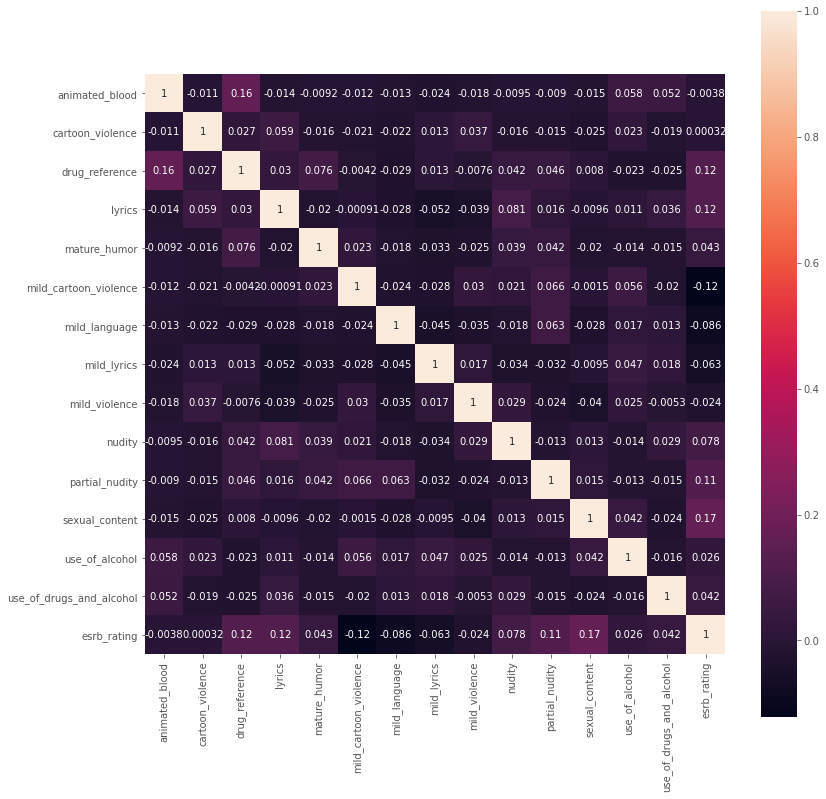

In [14]:
plt.figure(figsize=(13, 13))
sns.heatmap(train.corr(), annot=True, square = True)

In [30]:
train_X = train.loc[:, train.columns != "esrb_rating"].to_numpy()
train_Y = train[["esrb_rating"]].to_numpy()
train_Y = np.squeeze(train_Y)
train_X.shape

(1511, 14)

In [26]:
test_df = pd.read_csv("test_esrb.csv")
test_df = test_df.drop(columns=["title"])
test_df


,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,T
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,M
496,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
497,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,M
498,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,T


In [31]:
test_df = test_df.drop(columns=feature_imp.index)
test_df.head()
test_df.columns


Index(['animated_blood', 'cartoon_violence', 'drug_reference', 'lyrics',
       'mature_humor', 'mild_cartoon_violence', 'mild_language', 'mild_lyrics',
       'mild_violence', 'nudity', 'partial_nudity', 'sexual_content',
       'use_of_alcohol', 'use_of_drugs_and_alcohol', 'esrb_rating'],
      dtype='object')

In [32]:
test_X = test_df.loc[:, test_df.columns != "esrb_rating"].to_numpy()
print(test_X.shape)
test_Y = test_df[["esrb_rating"]].to_numpy()
test_Y = np.squeeze(test_Y)


(500, 14)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# build KNN model and choose n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=5)
# train the model
knn.fit(train_X, train_Y)
# get the predict value from X_test
y_pred = knn.predict(test_X)
# print the score
print('accuracy: ', knn.score(test_X, test_Y))
# accuracy:  0.973684210526


accuracy:  0.0


In [34]:
# import k-folder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# use the same model as before
knn = KNeighborsClassifier(n_neighbors=5)
# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn, train_X, train_Y, cv=5, scoring='accuracy')
# print all 5 times scores
print(scores)
# [ 0.96666667  1.          0.93333333  0.96666667  1.        ]
# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())
# 0.973333333333


[0.33993399 0.31788079 0.30794702 0.3013245  0.32450331]
0.31831792450768254


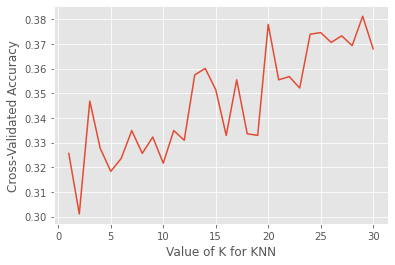

In [35]:
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_X, train_Y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
